In [39]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [44]:

batch_size = 40
img_height = 200
img_width = 200

In [46]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'dataset',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 8982 files belonging to 3 classes.
Using 1796 files for validation.


In [41]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 8982 files belonging to 3 classes.
Using 7186 files for training.


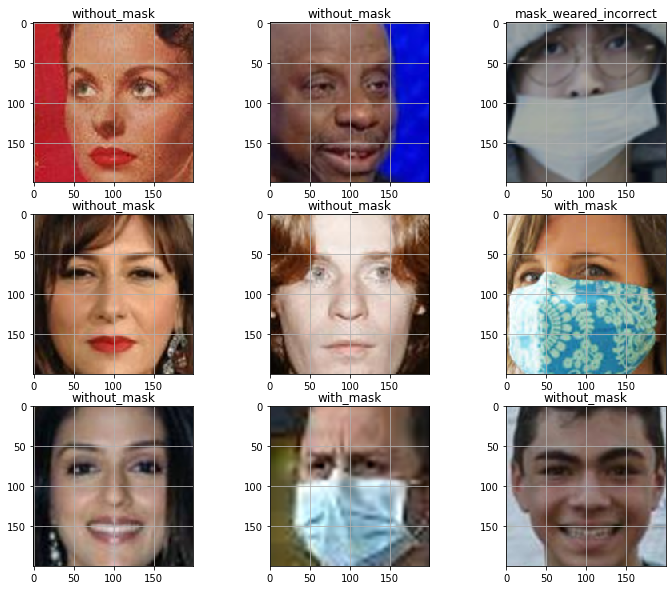

In [42]:
class_names = training_ds.class_names

plt.figure(figsize=(12, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.grid(True)
        #plt.axis("off")

In [48]:
val_batches = tf.data.experimental.cardinality(testing_ds)

test_dataset = testing_ds.take(val_batches//5)
validation_dataset = testing_ds.skip(val_batches//5)

In [82]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = training_ds.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
len(train_dataset),len(validation_dataset),len(test_dataset)

(180, 36, 9)

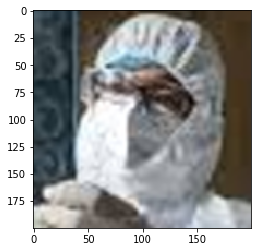

In [84]:
plt.imshow(image[0].numpy().astype('uint8'))

In [ ]:
data_augmentation=tf.keras.Sequential([

    tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(.5, .2),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
    tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.1),
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


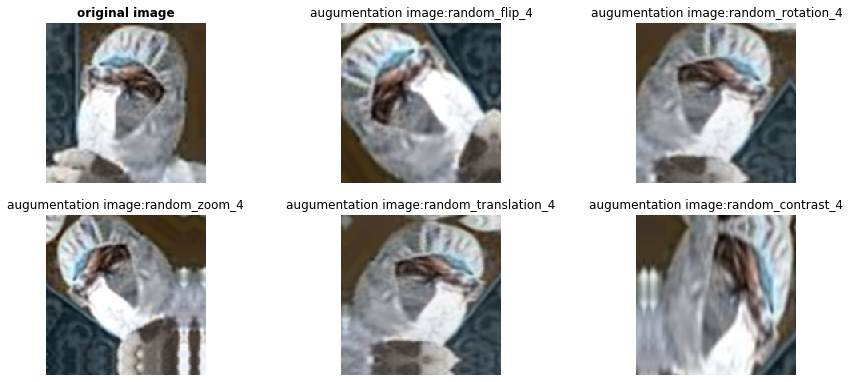

In [76]:

plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    if i==0:
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title("original image",fontweight='bold')
        plt.axis("off")
    else:
        data_aug_image=data_augmentation(tf.expand_dims(image[0],0))
        plt.imshow(data_aug_image[0]/255.0)
        plt.title("augumentation image:{}".format(data_augmentation.layers[i-1].name))
        plt.axis("off")
plt.show()